In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('limite_crédito.xlsx')
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [3]:
df.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


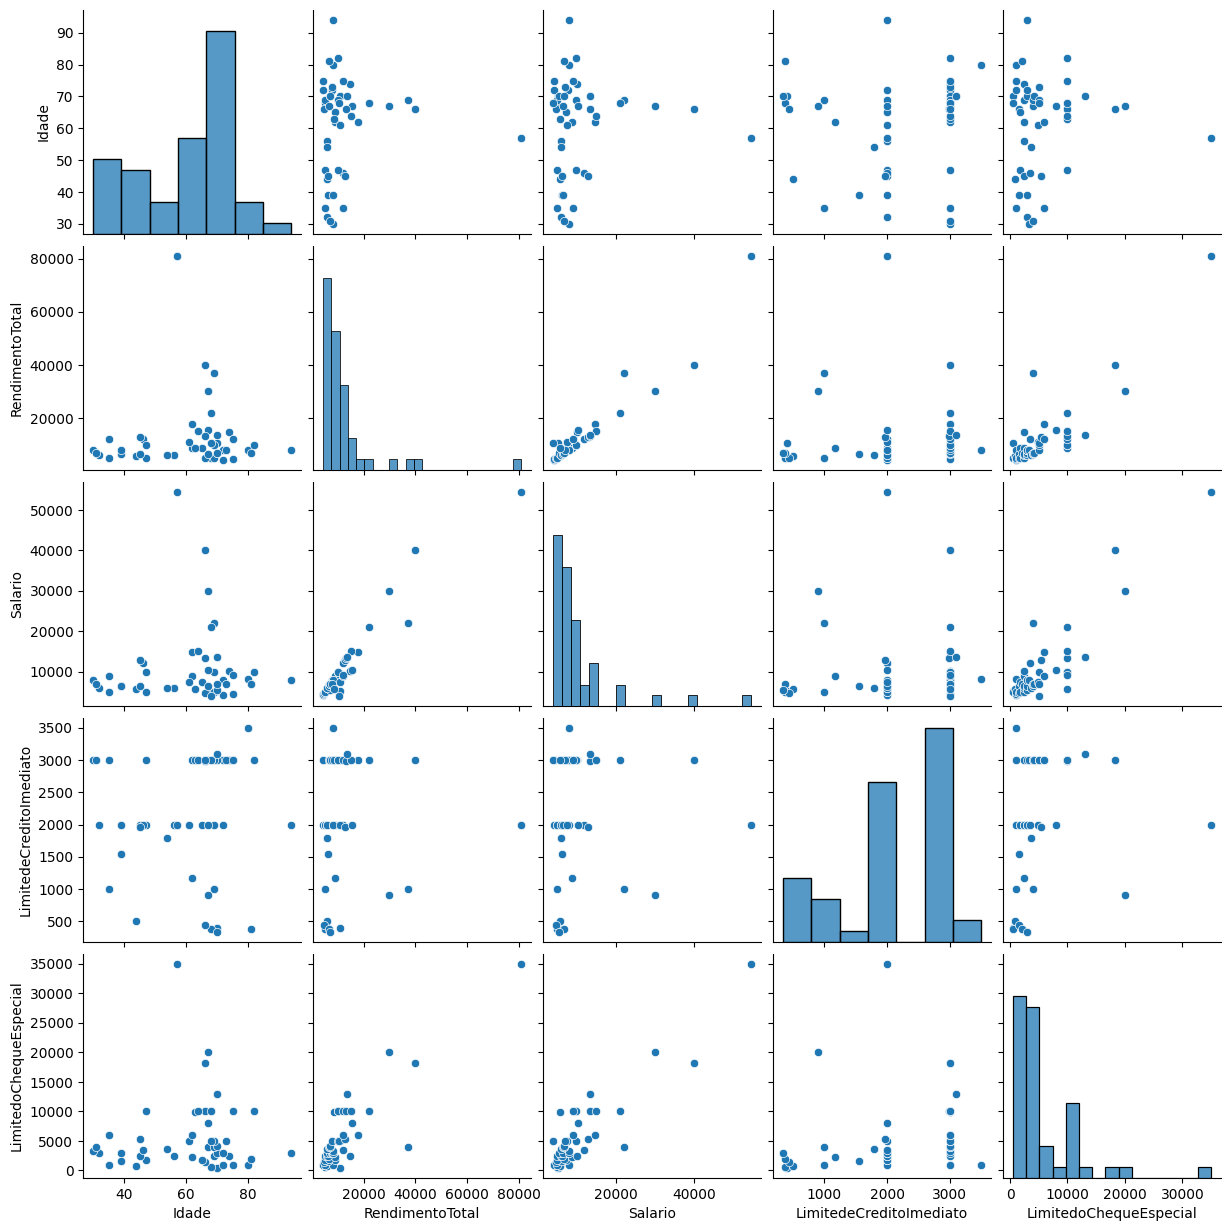

In [4]:
sns.pairplot(df);

In [5]:
import statsmodels.formula.api as smf

In [7]:
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=df).fit()

In [8]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Sat, 08 Jun 2024   Prob (F-statistic):           2.92e-15
Time:                            10:50:04   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [9]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=df).fit()

In [10]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Sat, 08 Jun 2024   Prob (F-statistic):           3.34e-16
Time:                            10:51:30   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [13]:
function = 'LimitedoChequeEspecial~Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=df).fit()

In [14]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Sat, 08 Jun 2024   Prob (F-statistic):           3.66e-17
Time:                            10:52:11   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [15]:
df['predict'] = model.predict()

In [16]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,predict
0,70,10736,5214,400,500,771.172966
1,68,5000,5000,380,600,627.670650
2,44,5800,5800,500,800,1210.054377
3,72,4300,4300,2000,1000,1869.506077
4,75,4400,4400,3000,1000,2942.390924
